## scipy.interpolate

1. **Enterpolasyon Nedir?**  
   Enterpolasyon, veri noktalarından bir fonksiyon türetme ve bu fonksiyonla eksik veya ölçülmemiş veri noktaları için **tahmin yapma** işlemidir.  
   **Örnek:** İki ölçüm noktası arasındaki değerleri tahmin etmek istediğinizde kullanılır.

2. **Kullanılan Modül:** `scipy.interpolate`  
   Python'da enterpolasyon işlemlerini kolayca gerçekleştiren bir modüldür. Bu modül, özellikle **FITPACK** algoritmasını kullanır ve çok çeşitli enterpolasyon yöntemleri sunar.


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.interpolate import interp1d  # interp1d fonksiyonunu scipy.interpolate'den içe aktar

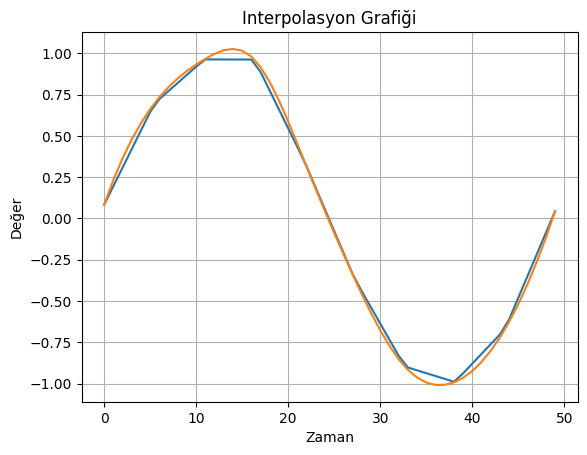

In [29]:
measured_time = np.linspace(0, 1, 10)  # 0 ile 1 arasında 10 eşit aralıklı nokta oluştur
noise = (np.random.random(10)*2 - 1) * 1e-1  # Rastgele bir gürültü (±0.1 aralığında) ekle
measures = np.sin(2 * np.pi * measured_time) + noise  # Sinüs fonksiyonuna gürültü ekle


linear_interp = interp1d(measured_time, measures)  # Verilere dayalı bir lineer enterpolasyon fonksiyonu oluştur

interpolation_time = np.linspace(0, 1, 50)  # 0 ile 1 arasında 50 eşit aralıklı nokta oluştur
linear_results = linear_interp(interpolation_time)  # Enterpolasyon fonksiyonu kullanarak tahmin yap
plt.title("Interpolasyon Grafiği")
plt.xlabel("Zaman")
plt.ylabel("Değer")
plt.grid(True)  # Izgara ekle
plt.plot(linear_results)

cubic_interp = interp1d(measured_time, measures, kind='cubic')  # Kübik enterpolasyon fonksiyonu oluşturuluyor

cubic_results = cubic_interp(interpolation_time)  # Kübik fonksiyon ile tahminler yapılıyor
plt.plot(cubic_results)


### Optimizasyon ve Uydurma: scipy.optimize

Optimizasyon, bir minimizasyon veya eşitlik için sayısal bir çözüm bulma problemidir.

**scipy.optimize** modülü, **fonksiyon minimizasyonu** (skaler veya çok boyutlu), **eğri uydurma** ve **kök bulma** algoritmaları sağlar.

Optimizasyon Nedir? Optimizasyon, bir fonksiyonu minimize etmek veya veri setine bir fonksiyon uydurmak için kullanılır. Burada curve_fit fonksiyonu, bir model fonksiyonu tanımlayıp bu modelin parametrelerini belirlemeye yarar.

In [30]:
from scipy import optimize  # scipy.optimize modülü içe aktarılır

### Eğri Uydurma (Curve Fitting)

Eğer verilerin bir sinüs dalgasına ait olduğunu biliyorsak, ancak genlik (amplitude) ve periyot (period) bilinmiyorsa, bunları en küçük kareler yöntemi ile bulabiliriz. İlk olarak, uydurulacak test fonksiyonunu tanımlamamız gerekiyor:

In [41]:
x_data = np.linspace(-5, 5, num=50)  # -5 ile 5 arasında 50 eşit aralıklı veri oluşturuluyor
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)  # Sinüs fonksiyonuna rastgele gürültü ekleniyor

def test_func(x, a, b):
    return a * np.sin(b * x)  # Bilinmeyen genlik (a) ve periyot (b) ile sinüs fonksiyonu

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])  # Başlangıç tahmini: [2, 2]
print(params)  # Bulunan parametreleri yazdır


[2.89144751 1.51004987]


### Skaler Bir Fonksiyonun Minimumunu Bulmak

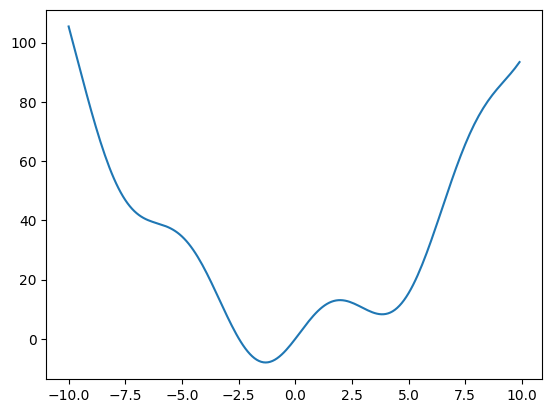

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -7.945823375615215
        x: [-1.306e+00]
      nit: 5
      jac: [-1.192e-06]
 hess_inv: [[ 8.589e-02]]
     nfev: 12
     njev: 6

In [45]:
def f(x):
    return x**2 + 10 * np.sin(x)  # x^2 ve 10*sin(x)'in toplamı olarak bir fonksiyon tanımlanıyor

x = np.arange(-10, 10, 0.1)  # -10 ile 10 arasında 0.1 adımlarla bir dizi oluşturuluyor
plt.plot(x, f(x))  # Fonksiyonun grafiği çiziliyor
plt.show()  # Grafiği görüntüle

result = optimize.minimize(f, x0=0)  # Minimumu bulmak için başlangıç noktası olarak x0=0 veriliyor
result  # Optimizasyon sonucu döndürülüyor



fun: -7.9458233756  # Bulunan minimum fonksiyon değeri

hess_inv: array([[0.0858...]])  # Hessian matrisinin tersinin tahmini

jac: array([-1.19209...e-06])  # Gradyan (jacobian)

message: 'Optimization terminated successfully.'  # Optimizasyonun başarılı olduğunu belirten mesaj

nfev: 18  # Fonksiyon değerlendirme sayısı

nit: 5  # Optimizasyon sırasında yapılan iterasyon sayısı

njev: 6  # Jacobian hesaplamalarının sayısı

status: 0  # Optimizasyonun durum kodu (0: Başarılı)

success: True  # Optimizasyonun başarılı olup olmadığı

x: array([-1.30644...])  # Minimumun bulunduğu koordinat


In [46]:
result.x  # Minimum noktasının koordinatı


array([-1.30644012])

In [48]:
result.x  # x ≈ -1.306


array([-1.30644012])

In [49]:
result.fun  # f(x) ≈ -7.945

-7.945823375615215

Fonksiyon düzgün bir fonksiyon olduğu için, gradyan inişine **(gradient-descent)** dayalı yöntemler iyi bir seçenektir. Genel olarak L-BFGS-B algoritması iyi bir seçimdir:

In [50]:
optimize.minimize(f, x0=0, method="L-BFGS-B")  # L-BFGS-B yöntemiyle minimizasyon yapılır


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -7.94582337561514
        x: [-1.306e+00]
      nit: 5
      jac: [-1.688e-06]
     nfev: 12
     njev: 6
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

Bu algoritma, minimum değeri bulmak için yalnızca 12 fonksiyon değerlendirmesi yaptı.

fun: array([-7.945823338])  # Bulunan minimum fonksiyon değeri

hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>  # Yaklaşık ters Hessian matrisi

jac: array([-1.42108547e-06])  # Gradyan (Jacobian)

message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'  # Optimizasyon başarı mesajı

nfev: 12  # Fonksiyon değerlendirme sayısı

nit: 5  # İterasyon sayısı

status: 0  # Başarı durumu (0: Başarılı)

success: True  # Optimizasyonun başarılı olup olmadığı

x: array([-1.30644013])  # Minimumun bulunduğu koordinat


In [55]:
res = optimize.minimize(f, x0=3, method="L-BFGS-B")  # Başlangıç noktası 3 olarak ayarlandı
res.x  # Bulunan minimumun koordinatı
# Çıktı: array([3.83746709])  # Yerel minimum


array([3.83746709])

## Global Minimum Bulma:

Eğer global minimumun çevresini bilmiyorsak ve uygun bir başlangıç noktası seçemiyorsak, daha maliyetli global optimizasyon yöntemlerine başvurmamız gerekir.  
Global minimumu bulmak için `scipy.optimize.basinhopping()` fonksiyonunu kullanabiliriz (SciPy 0.12.0'dan itibaren eklenmiştir).

**Bu yöntem, yerel bir optimize ediciyle başlangıç noktalarının örneklenmesini birleştirir.**


In [57]:
optimize.basinhopping(f, 0)  # Global minimumu bulmak için basinhopping yöntemi kullanılıyor


                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -7.945823375615284
                          x: [-1.306e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 1000
                       njev: 500
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -7.945823375615284
                                    x: [-1.306e+00]
                                  nit: 3
                                  jac: [ 0.000e+00]
                             hess_inv: [[ 8.581e-02]]
                                 nfev: 10
                                 njev: 5

nfev: 1725  # Fonksiyon değerlendirme sayısı

minimization_failures: 0  # Başarısızlık sayısı

fun: -7.9458233756125845  # Bulunan minimum fonksiyon değeri

x: array([-1.30644001])  # Global minimumun bulunduğu koordinat

message: ['requested number of basinhopping iterations completed successfully']  # Başarı mesajı

njev: 575  # Gradyan değerlendirme sayısı

nit: 100  # Basinhopping iterasyon sayısı


Bir fonksiyonun **yerel minimumu,** fonksiyonun bulunduğu bölgede en düşük değere sahip olduğu noktadır.

**Global minimum,** fonksiyonun genel olarak alabileceği en düşük değeri ifade eder.

**L-BFGS-B yöntemi hızlıdır, ancak yerel minimumlarda takılabilir.**

**Basinhopping yöntemi, daha fazla işlem yaparak global minimumu bulur.**

In [60]:
res = optimize.minimize(f, x0=1, bounds=((0, 10),))
res.x  # Bulunan minimum noktanın koordinatı
# Çıktı: array([0.]) 
# Bu kısıtlama, fonksiyonun minimum değerlerinden biri olmayan 0 değerini bulmamıza yol açtı.


array([0.])

### Fonksiyon Tanımı ve 2D Görselleştirme

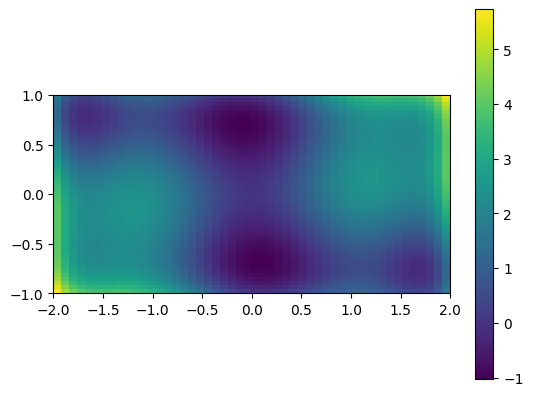

In [64]:
# Optimize etmek istediğimiz fonksiyonu tanımlıyoruz
def sixhump(x):
    return ((4 - 2.1 * x[0]**2 + x[0]**4 / 3) * x[0]**2 + x[0] * x[1] +
            (-4 + 4 * x[1]**2) * x[1]**2)  # Camelback fonksiyonu matematiksel formülü

# Fonksiyonu değerlendirmek için bir ızgara oluşturuyoruz
x = np.linspace(-2, 2, 50)  # x ekseninde -2 ile 2 arasında 50 değer oluştur
y = np.linspace(-1, 1, 50)  # y ekseninde -1 ile 1 arasında 50 değer oluştur
xg, yg = np.meshgrid(x, y)  # Meshgrid, 2D koordinat matrisi oluşturur


plt.figure()  # Yeni bir figür oluştur
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")  # 2D görüntü çiz
plt.colorbar()  # Renk skalasını ekle


Text(0.5, 0.92, 'Six-hump Camelback function')

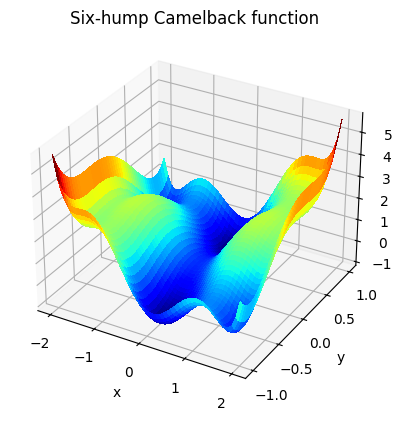

In [67]:
from mpl_toolkits.mplot3d import Axes3D  # 3D grafik çizimi için modül

fig = plt.figure()  # Yeni bir figür oluştur
ax = fig.add_subplot(111, projection='3d')  # 3D alt grafik oluştur

# Camelback fonksiyonunu 3D yüzey olarak çiz
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')  # x ekseni etiketi
ax.set_ylabel('y')  # y ekseni etiketi
ax.set_zlabel('f(x, y)')  # z ekseni etiketi
ax.set_title('Six-hump Camelback function')  # Başlık


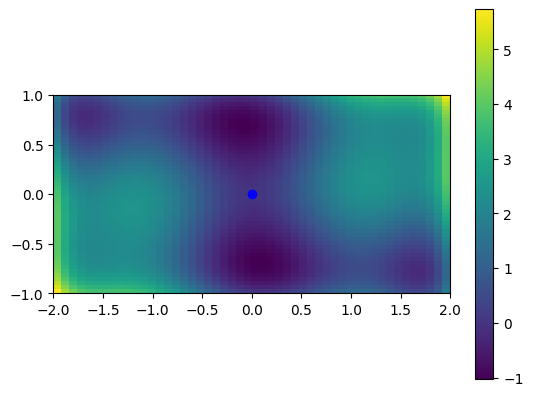

In [66]:
x_min = optimize.minimize(sixhump, x0=[0, 0])  # Camelback fonksiyonunun minimumunu bul

plt.figure()  # Yeni bir figür oluştur
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")  # 2D görselleştirme
plt.colorbar()  # Renk skalasını ekle

# Bulunan minimum noktayı işaretle
plt.scatter(x_min.x[0], x_min.x[1], color="blue")  # Minimum noktayı mavi nokta ile göster
plt.show()  # Grafiği görüntüle



### **Skaler Bir Fonksiyonun Köklerini Bulmak**

In [70]:
root = optimize.root(f, x0=1)  # İlk tahminimiz 1
root  # Tüm sonuç
# Çıktı:
# fjac: array([[-1.]])
# fun: array([0.])
# message: 'The solution converged.'
# nfev: 10
# qtf: array([1.33310463e-32])
# status: 1
# success: True
# x: array([0.])


 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 0.000e+00]
  method: hybr
    nfev: 12
    fjac: [[-1.000e+00]]
       r: [-1.000e+01]
     qtf: [ 1.333e-32]

In [71]:
root.x  # Bulunan tek kök
# Çıktı: array([0.])


array([0.])

In [72]:
root2 = optimize.root(f, x0=-2.5)  # Yeni tahmin: -2.5
root2.x
# Çıktı: array([-2.47948183])


array([-2.47948183])

### **İstatistikler ve Rastgele Sayılar: scipy.stats**

scipy.stats modülü, rastgele süreçlerin istatistiksel araçlarını ve olasılık açıklamalarını içerir. Çeşitli rastgele süreçler için rastgele sayı üreteçleri numpy.random modülünde bulunabilir.

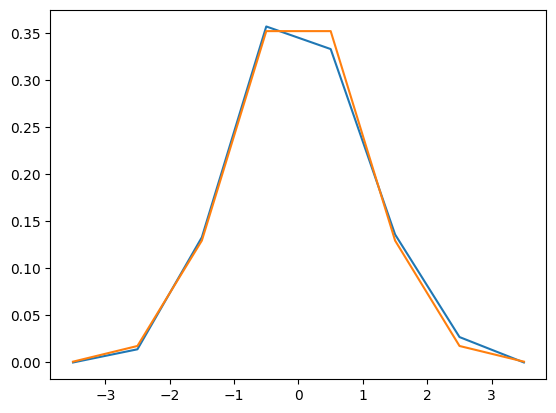

np.float64(0.022120589586897943)

In [80]:
# Dağılımlar: Histogram ve Olasılık Yoğunluk Fonksiyonu (PDF):

samples = np.random.normal(size=1000)  # 1000 adet normal dağılıma sahip rastgele örnek üret
bins = np.arange(-4, 5)  # Histogram için aralıkları belirle

# Histogram hesaplama:

histogram = np.histogram(samples, bins=bins, density=True)[0]  # Histogram hesapla, yoğunluk normalize edilmiş
bins = 0.5 * (bins[1:] + bins[:-1])  # Bin merkezlerini hesapla


# PDF ile karşılaştırma:
pdf = stats.norm.pdf(bins)  # Norm, normal dağılımın PDF'sini temsil eder

# Çizim:
plt.plot(bins, histogram)  # Histogramı çiz
plt.plot(bins, pdf)  # Normal dağılım PDF'sini histogramla karşılaştır
plt.show()  # Grafiği göster

# Histogram ve teorik PDF'nin uyumu, normal dağılımın gözlemlerle ne kadar iyi eşleştiğini görselleştirir.





In [83]:
loc, std = stats.norm.fit(samples)  # Örneklerin dağılım parametrelerini tahmin et
loc  # Ortalama (mu)



np.float64(0.022120589586897943)

In [84]:
std  # Standart sapma (sigma)

np.float64(0.9889164012474114)

### **Ortalama, Medyan ve Yüzdelikler**

In [85]:
np.mean(samples)  # Örneklerin ortalamasını hesapla
# Çıktı: -0.0452567074...


np.float64(0.022120589586897943)

In [86]:
np.median(samples)  # Örneklerin medyanını hesapla
# Çıktı: -0.0580280347...
# Medyan, merkezin başka bir tahmincisidir. Bu, gözlemlerin yarısının altında, yarısının ise üstünde olduğu değerdir:

np.float64(-0.004303692073418161)

In [87]:
stats.scoreatpercentile(samples, 50)  # 50. yüzdelik değeri hesapla
# Çıktı: -0.0580280347...


np.float64(-0.004303692073418161)

In [88]:
stats.scoreatpercentile(samples, 90)  # 90. yüzdelik değeri hesapla
# Çıktı: 1.2315935511...


np.float64(1.304274675745133)

### **İstatistiksel Testler**

Bir istatistiksel test, karar vermek için bir göstergedir. Örneğin, iki gözlem setimiz olduğunu ve bunların Gaussian (normal) süreçlerden üretildiğini varsayalım. Bu durumda, iki gözlem setinin ortalamalarının anlamlı bir şekilde farklı olup olmadığını belirlemek için bir T-testi kullanabiliriz:

In [89]:
a = np.random.normal(0, 1, size=100)  # Ortalama 0, standart sapma 1 olan 100 örnek üret
b = np.random.normal(1, 1, size=100)  # Ortalama 1, standart sapma 1 olan 100 örnek üret

stats.ttest_ind(a, b)  # İki bağımsız örnek arasında T-testi yap


TtestResult(statistic=np.float64(-5.551190129515926), pvalue=np.float64(9.040337967441588e-08), df=np.float64(198.0))

**T-istatistik değeri:**
-3.177... gibi bir negatif değer, b örneklerinin ortalamasının a örneklerinden daha büyük olduğunu (negatif fark) gösterir.

**p-değeri:**
0.0019... gibi bir değer, bu farkın istatistiksel olarak anlamlı olduğunu gösterir (genellikle p < 0.05 anlamlı kabul edilir).

T-statistik: -5.981977648845712
p-değeri: 1.0151140428316923e-08


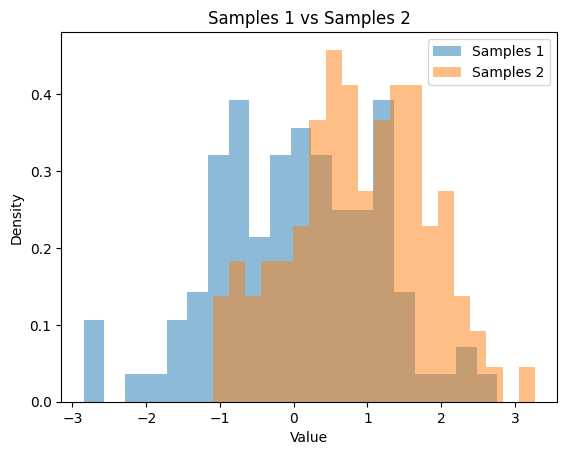

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Rastgele normal dağılım örnekleri oluştur
a = np.random.normal(0, 1, size=100)  # Ortalama 0, standart sapma 1 olan 100 örnek
b = np.random.normal(1, 1, size=100)  # Ortalama 1, standart sapma 1 olan 100 örnek

# 2. T-testi uygula
t_stat, p_value = stats.ttest_ind(a, b)
print("T-statistik:", t_stat)
print("p-değeri:", p_value)

# 3. Histogramları çiz
plt.hist(a, bins=20, alpha=0.5, label="Samples 1", density=True)  # Örnek 1 histogramı
plt.hist(b, bins=20, alpha=0.5, label="Samples 2", density=True)  # Örnek 2 histogramı

# 4. Grafik detayları
plt.legend(loc='upper right')  # Etiketler
plt.title("Samples 1 vs Samples 2")  # Başlık
plt.xlabel("Value")  # X ekseni etiketi
plt.ylabel("Density")  # Y ekseni etiketi

# 5. Grafiği göster
plt.show()
